In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
df_train = pd.read_csv("boston-housing/train.csv")

In [3]:
print(df_train.head())

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


In [4]:
print(np.sum(np.isnan(df_train)))

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


/home/akshay/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


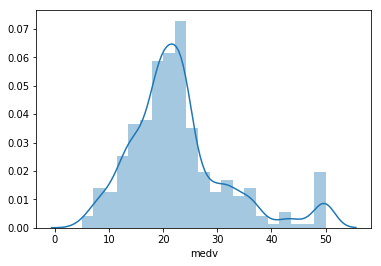

In [5]:
import seaborn as sns
sns.distplot(df_train['medv'])

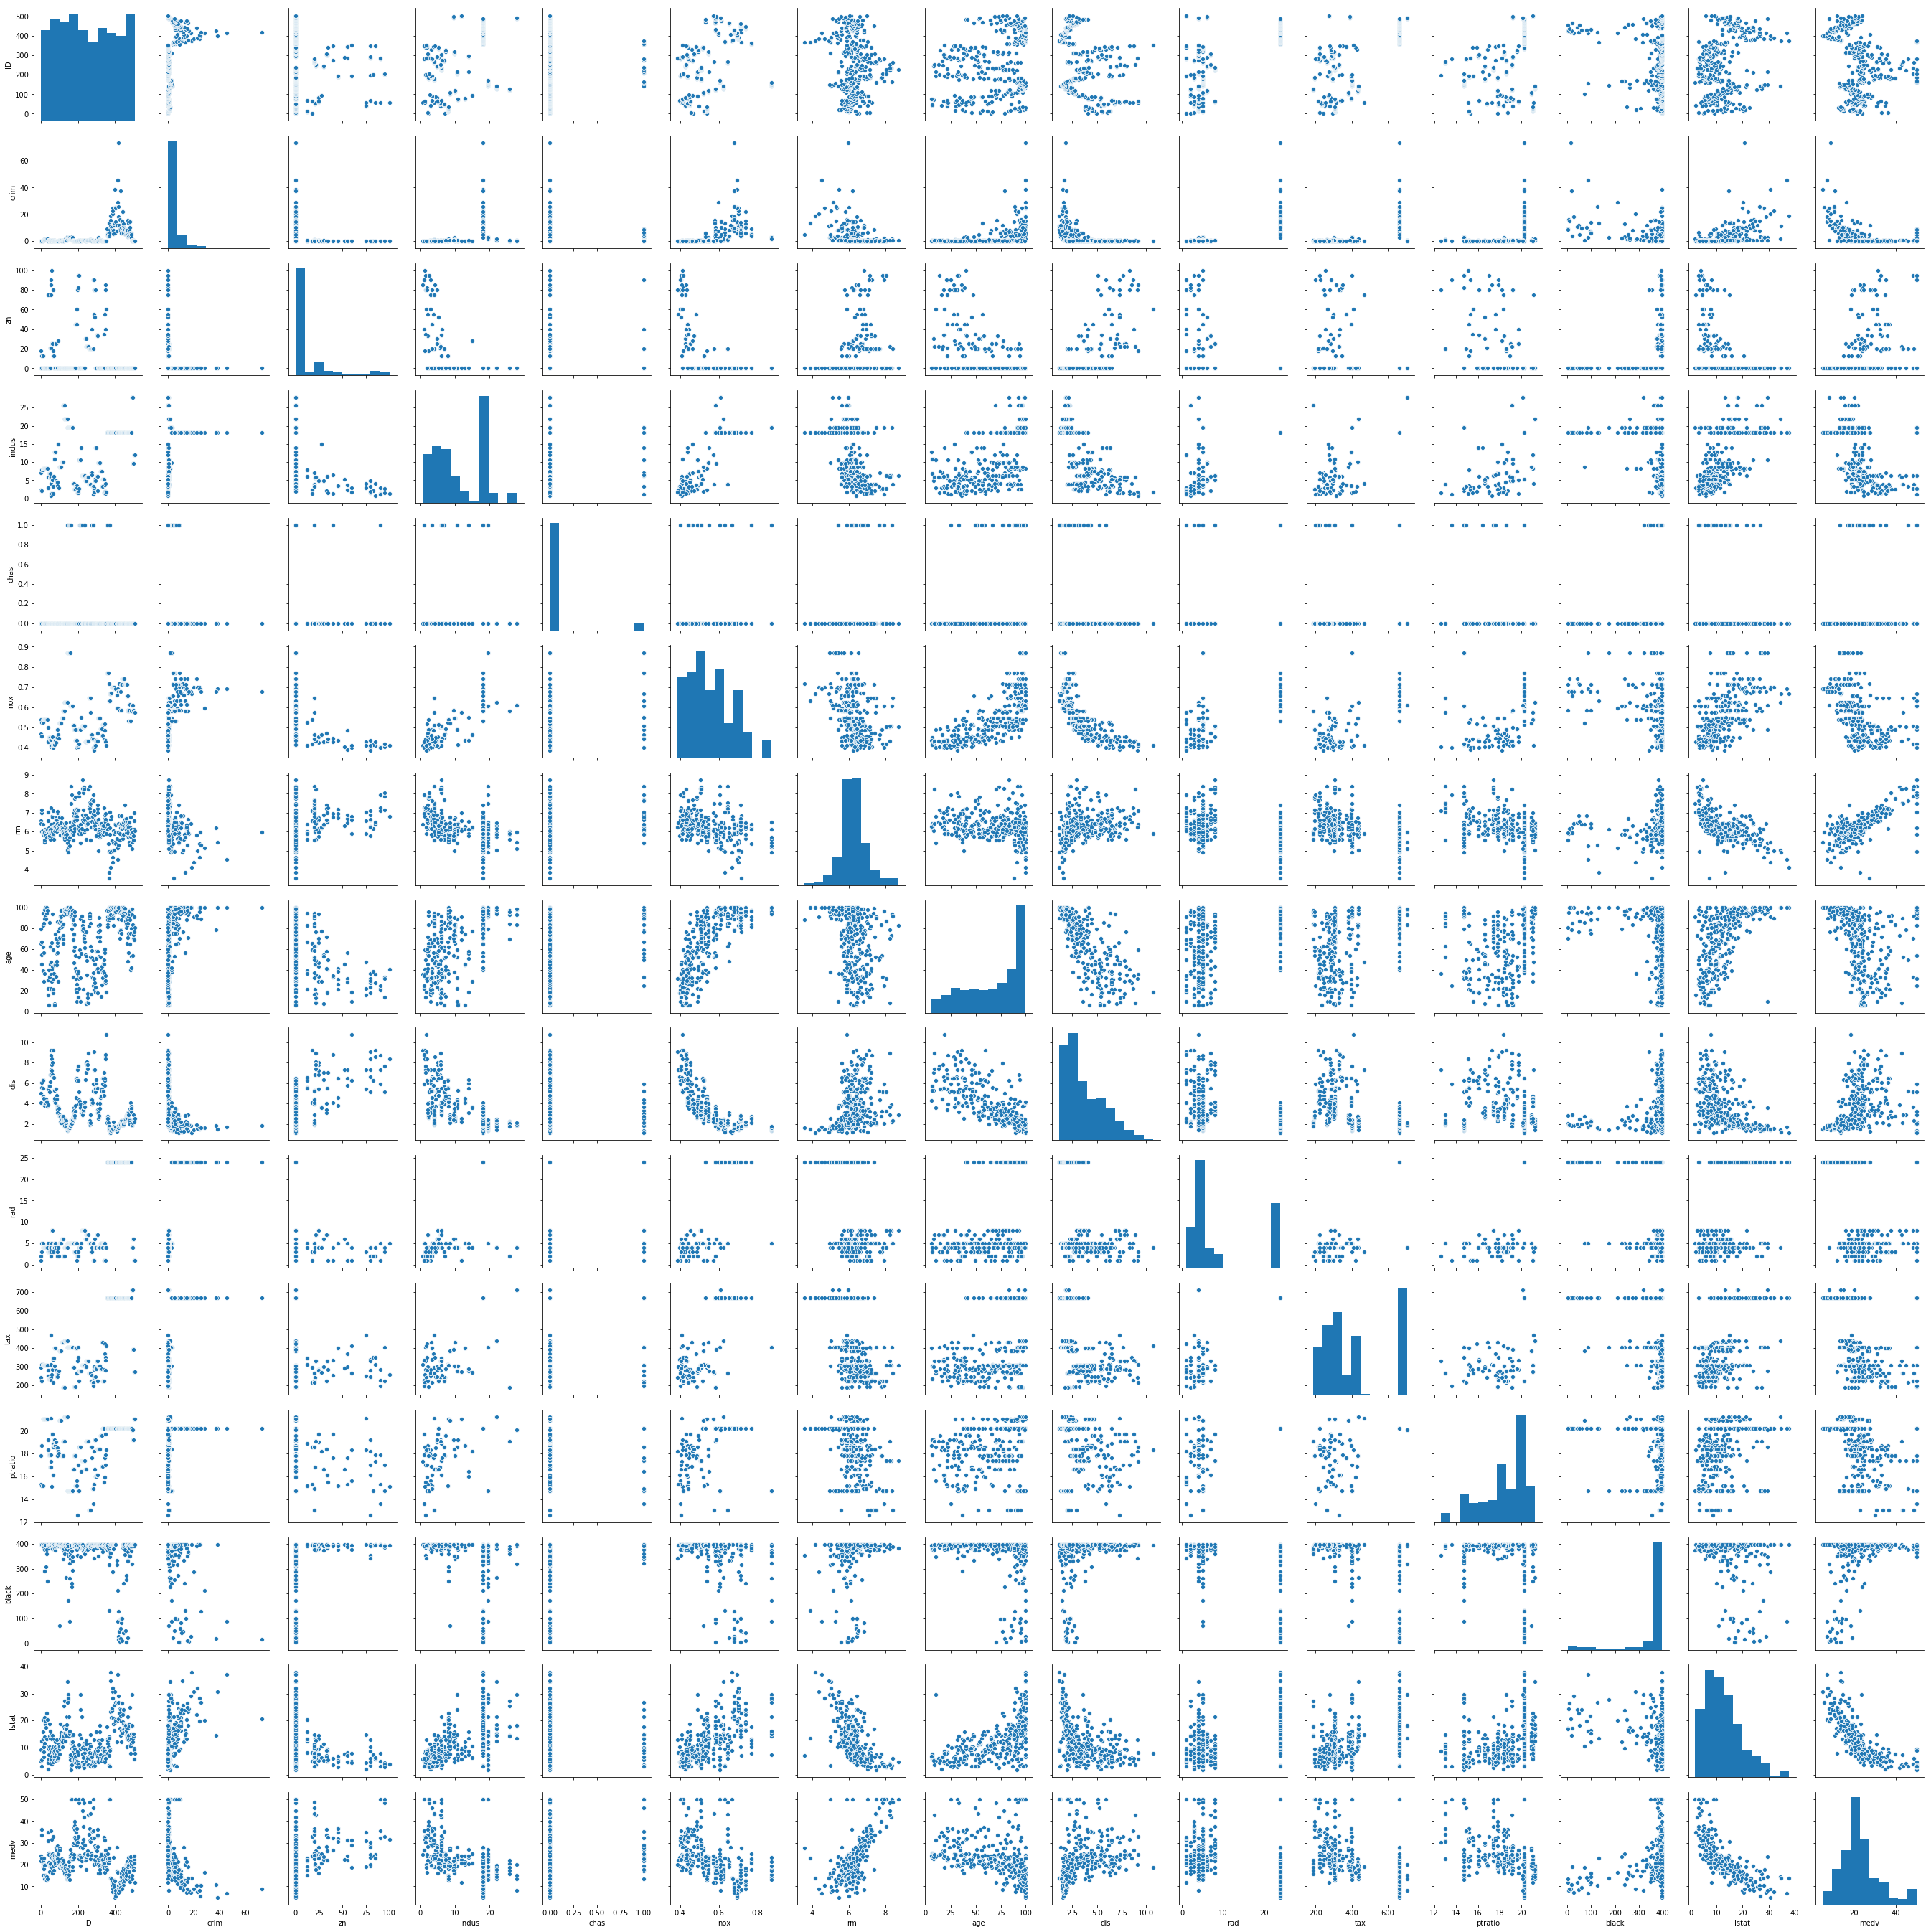

In [6]:
sns.pairplot(df_train)

In [7]:
from sklearn.model_selection import train_test_split
y = df_train['medv']
X = df_train.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

((233,), (233,), (100,), (100,))


In [8]:
batch_size = 50
num_epochs = 500
learning_rate = 0.01
hidden_size = 1
batch_no = X_train.shape[0]//batch_size
cols = 1
n_output = 1

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, n_features, hidden_size, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, hidden_size)
        self.output = torch.nn.Linear(hidden_size, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

net = Net(cols, hidden_size, n_output)
        

In [10]:
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
criterion = torch.nn.MSELoss(size_average = False)

/home/akshay/anaconda2/lib/python2.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [11]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [12]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, y_train = shuffle(X_train, y_train)
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]).reshape(-1,1))
#         print(inputs.shape)
        labels = Variable(torch.FloatTensor(y_train[start:end]))
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print("outputs",outputs)
        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0



('Epoch 1', 'loss: ', 120154.38671875)
('Epoch 2', 'loss: ', 117532.791015625)
('Epoch 3', 'loss: ', 114919.423828125)
('Epoch 4', 'loss: ', 111776.38671875)
('Epoch 5', 'loss: ', 103400.048828125)
('Epoch 6', 'loss: ', 100047.234375)
('Epoch 7', 'loss: ', 96154.74609375)
('Epoch 8', 'loss: ', 100084.4140625)
('Epoch 9', 'loss: ', 91748.130859375)
('Epoch 10', 'loss: ', 93368.62109375)
('Epoch 11', 'loss: ', 88037.0390625)
('Epoch 12', 'loss: ', 76917.271484375)
('Epoch 13', 'loss: ', 78817.91015625)
('Epoch 14', 'loss: ', 78049.16015625)
('Epoch 15', 'loss: ', 67262.7177734375)
('Epoch 16', 'loss: ', 68831.6748046875)
('Epoch 17', 'loss: ', 65008.740234375)
('Epoch 18', 'loss: ', 63476.4892578125)
('Epoch 19', 'loss: ', 60498.869140625)
('Epoch 20', 'loss: ', 61909.6572265625)
('Epoch 21', 'loss: ', 57904.05078125)
('Epoch 22', 'loss: ', 60969.3671875)
('Epoch 23', 'loss: ', 57176.25390625)
('Epoch 24', 'loss: ', 60528.712890625)
('Epoch 25', 'loss: ', 58012.6689453125)
('Epoch 26', '

('Epoch 296', 'loss: ', 7104.0819091796875)
('Epoch 297', 'loss: ', 6888.8360595703125)
('Epoch 298', 'loss: ', 7028.474609375)
('Epoch 299', 'loss: ', 7158.407958984375)
('Epoch 300', 'loss: ', 7622.813720703125)
('Epoch 301', 'loss: ', 6314.616455078125)
('Epoch 302', 'loss: ', 7124.0816650390625)
('Epoch 303', 'loss: ', 7542.4638671875)
('Epoch 304', 'loss: ', 6836.0809326171875)
('Epoch 305', 'loss: ', 6947.311767578125)
('Epoch 306', 'loss: ', 7159.6982421875)
('Epoch 307', 'loss: ', 7070.3863525390625)
('Epoch 308', 'loss: ', 6214.946044921875)
('Epoch 309', 'loss: ', 6043.11865234375)
('Epoch 310', 'loss: ', 7006.9722900390625)
('Epoch 311', 'loss: ', 7100.0531005859375)
('Epoch 312', 'loss: ', 7177.010192871094)
('Epoch 313', 'loss: ', 7427.8624267578125)
('Epoch 314', 'loss: ', 6055.637756347656)
('Epoch 315', 'loss: ', 7020.6292724609375)
('Epoch 316', 'loss: ', 7152.833251953125)
('Epoch 317', 'loss: ', 6609.306884765625)
('Epoch 318', 'loss: ', 7188.609130859375)
('Epoch 31

In [13]:
from sklearn.metrics import r2_score
def calculate_r2(x,y=[]):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x).reshape(-1, 1))
    result = net(X) #This outputs the value for regression
    result=result.data[:,0].numpy()
  
    if len(y) != 0:
        r2=r2_score(result, y)
        print("R-Squared", r2)
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': result})
    else:
        print("returning predictions")
        return result

In [14]:
result1 = calculate_r2(X_train, y_train)
result2 = calculate_r2(X_test, y_test)

('R-Squared', 0.43584208173561045)
('R-Squared', 0.2784671029282304)
